In [1]:
%matplotlib notebook

In [50]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d


def load_file(filename):
    with open(filename, 'r') as infile:
        foo = np.fromfile(infile, dtype=np.uint32)

    with open(filename, 'r') as infile:
        bar = np.fromfile(infile, dtype=np.float32)

    header = foo[:4]
    body = bar[4:]
    
    height, width, channels = header[1], header[2], header[3]
    
    return body.reshape(height, width, channels)


def get_coords(height, width):
    y, x = np.meshgrid(np.arange(0.0, width, 1.0), np.arange(0.0, height, 1.0))
    z = np.float32([0.0] * (height * width))
    z = z.reshape(height, width)
    
    return x, y, z


def subsample(x, height, width, skip=1):
    return np.expand_dims(x[::skip,::skip], -1)


def get_points(filename, skip):
    body = load_file(filename)
    
    h, w, c = body.shape
    x, y, z = get_coords(h, w)
    u, v, w = body[:,:,0], body[:,:,1], body[:,:,2]
    
    return body, [subsample(coord, h, w, skip) for coord in [x, y, z, u, v, w]]


def quiver_plot(x, y, z, u, v, w):
    ax = plt.figure().gca(projection='3d')
    # ax._axis3don = False
    ax.set_zlim3d(-1, 1)
    ax.quiver(x, y, z, u, v, w)

    plt.show()
    

def normalize_center(x):
    return normalize(x - x.mean())


def normalize(x):
    return (x - x.min()) / (x.max() - x.min())

(600, 800, 4)
[-0.1091  0.1902 -0.0112  0.0731] [nan nan nan nan]
[ 0.2427 -0.0522 -0.0499 -0.0758] [-0.2582 -0.6193 -0.066  -0.1955]
-93356.37
0.13548541666666666
-0.23846 	 0.00991 	 0.46307 	 0.01686
-0.93567 	 -0.07235 	 0.20186 	 0.06463
-0.06493 	 -0.00181 	 0.46243 	 0.00995
-2.05588 	 -0.15574 	 0.07315 	 0.21552


<IPython.core.display.Javascript object>


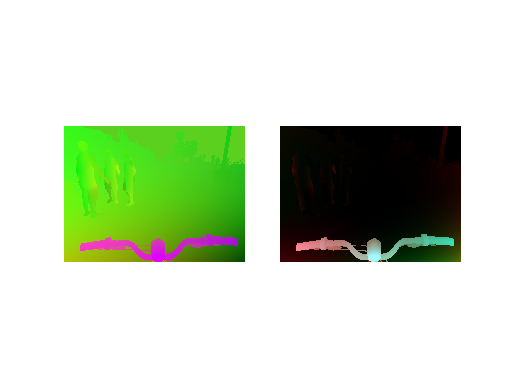

<IPython.core.display.Javascript object>


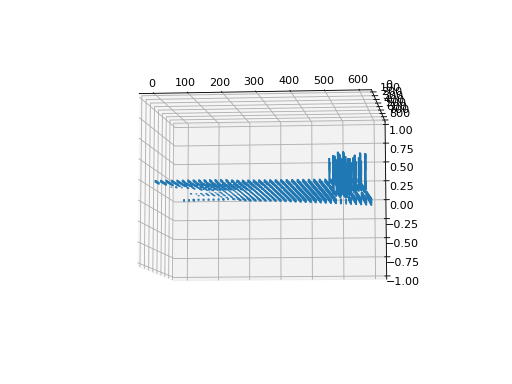

In [51]:
import os
import glob

    
def plot_image(image, use_centered, num):
    func = normalize_center if use_centered else lambda x: normalize(x ** 2)
    rgb = np.stack([func(image[:,:,i]) for i in range(3)], -1)
    
    plt.subplot(1, 2, num)
    plt.axis('off')
    plt.imshow(np.uint8(rgb * 255.0))
    
    
def clean(vector):
    vector[np.isnan(vector)] = 0.0
    
    
def show_info(vector):
    filtered = vector[~np.isnan(vector)]
    
    info = list()
    info += [filtered.min()]
    info += [filtered.mean()]
    info += [filtered.max()]
    info += [(filtered ** 2).mean()]
    
    print(' \t '.join(map(lambda x: '%.5f' % x, info)))
    
    
np.set_printoptions(precision=4, suppress=True)
    

gtadir = '/mnt/d/games/Grand Theft Auto V/cap/'
capdir = '2018_08_10_01_21_45'
raw = '00003943_velocity.raw'

filename = os.path.join(gtadir, capdir, raw)

scale_u = 1e0
scale_v = 1e0
scale_w = 1e0
skip = 16

body, (x, y, z, u, v, w) = get_points(filename, skip)
 
print(body.shape)
print(body[0,0], body[0,-1])
print(body[-1,0], body[-1,-1])
print(body[~np.isnan(body)].sum())
print(np.isnan(body).sum() /  (body.shape[0] * body.shape[1] * body.shape[2]))

show_info(u)
show_info(v)
show_info(w)
show_info(body[:,:,-1])
    
clean(u)
clean(v)
clean(w)
clean(body)

plot_image(body, True, 1)
plot_image(body, False, 2)
plt.show()    

quiver_plot(x, y, z, u * scale_u, v * scale_v, w * scale_w)